In [1]:
%matplotlib widget

RuntimeError: 'widget' is not a recognised GUI loop or backend name

In [ ]:
import pandas as pd
from zipfile import Path as ZipPath
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [ ]:
irl1_zp = ZipPath('slice.zip', at='IRL-2.1.csv')
irl2_zp = ZipPath('slice.zip', at='IRL-2.2.csv')
trpp_zp = ZipPath('slice.zip', at='trpp.csv')


In [ ]:
with irl1_zp.open() as f:
    irl1_df = pd.read_csv(f,
                          parse_dates=['UTC'],
                          date_format='%Y-%m-%d %H:%M:%S.%f',
                          index_col='UTC',
                         )


In [ ]:
with irl2_zp.open() as f:
    irl2_df = pd.read_csv(f,
                          parse_dates=['UTC'],
                          date_format='%Y-%m-%d %H:%M:%S.%f',
                          index_col='UTC',
                         )


In [ ]:
with trpp_zp.open() as f:
    trpp_df = pd.read_csv(f,
                          parse_dates=['UTC'],
                          date_format='%Y-%m-%d %H:%M:%S.%f',
                          index_col='UTC',
                         )


<Axes: xlabel='UTC'>

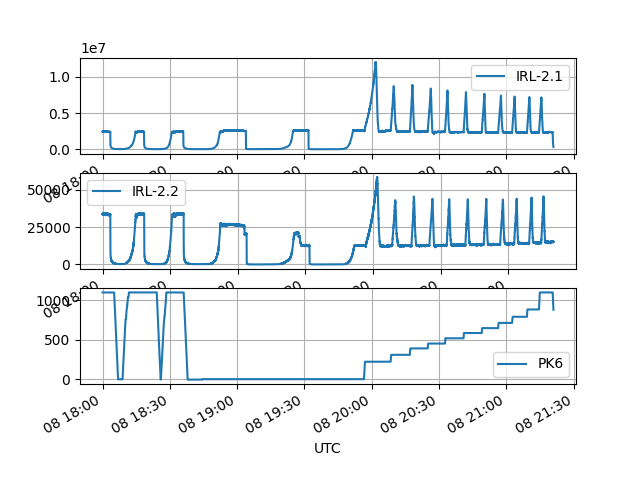

In [ ]:
fig, (irl1_ax, irl2_ax, trpp_ax) = plt.subplots(nrows=3)

irl1_df.plot(ax=irl1_ax, y='Flux, cps', label='IRL-2.1', grid=True)
irl2_df.plot(ax=irl2_ax, y='Flux, cps', label='IRL-2.2', grid=True)
trpp_df.plot(y=['PK6',
                #'PK2', 'PK3', 'PK4', 'PK5',
                #'PAR',
                #'PK1', 'PK6',
                #'PB1', 'PB2', 'PB3', 'PB4', 'PB5', 'PB6'
                          ],
                        ax=trpp_ax,
                        grid=True,
                        )


In [ ]:
interwals = {
    'okres_1': slice('2025-12-08 19:53:00', '2025-12-08 20:03:00'), # skok z 0 do 218
    'okres_2': slice('2025-12-08 20:05:00', '2025-12-08 20:12:00'), # do 307 
    'okres_3': slice('2025-12-08 20:14:00', '2025-12-08 20:20:00'), # do 389
    'okres_4': slice('2025-12-08 20:23:00', '2025-12-08 20:27:00'), # do 450
    'okres_5': slice('2025-12-08 20:32:00', '2025-12-08 20:35:00'), # do 518
    'okres_6': slice('2025-12-08 20:40:00', '2025-12-08 20:43:00'), # do 585 
    'okres_7': slice('2025-12-08 20:48:00', '2025-12-08 20:51:00'), # do 644 
    'okres_8': slice('2025-12-08 20:55:00', '2025-12-08 20:59:00'), # do 712 
    'okres_9': slice('2025-12-08 21:01:00', '2025-12-08 21:05:00'), # do 790 
    'okres_10': slice('2025-12-08 21:08:00', '2025-12-08 21:11:00'), # do 884 
    'okres_11': slice('2025-12-08 21:13:00', '2025-12-08 21:17:00'), # do 1100 
}

In [ ]:
irl1_df['Flux, cps'][interwals['okres_1']].values

array([2639999.25, 2638459.75, 2635631.75, ..., 2677657.5 , 2672595.75,
       2669280.25], shape=(6010,))

In [ ]:
def expo(t, A, T, t0):
    return A*(np.exp((t-t0)/T))

def WOG1(T):
    b_i = [6.552e-03]
    l_i = [0.4]
    L = 146e-6
    b = sum(b_i)
    suma = 0
    for bi,li in zip(b_i,l_i):
        suma += bi/(li + 1/T)
    return (L+suma)/(T*b)

def WOG6(T):
    b_i = [2.430e-04, 1.363e-03, 1.203e-03, 2.605e-03, 8.190e-04, 1.670e-04]
    l_i = [1.270e-02, 3.170e-02, 1.150e-01, 3.110e-01, 1.400e+00, 3.870e+00]
    L = 146e-6
    b = sum(b_i)
    suma = 0
    for bi,li in zip(b_i,l_i):
        suma += bi/(li + 1/T)
    return (L+suma)/(T*b)

def WOG15(T):
    b_i = [2.430e-04, 1.363e-03, 1.203e-03, 2.605e-03, 8.190e-04, 1.670e-04, 
           2.07e-5, 3.66e-5, 1.85e-5, 3.68e-5, 3.66e-6, 3.2e-5, 2.6e-6, 3.8e-7, 5.7e-7]
    l_i = [1.270e-02, 3.170e-02, 1.150e-01, 3.110e-01, 1.400e+00, 3.870e+00,
           2.265e-2, 8.886e-3, 3.61e-3, 7.453e-4, 2.674e-4, 6.191e-5, 1.591e-5, 2.478e-6, 6.098e-7]
    L = 146e-6
    b = sum(b_i)
    suma = 0
    for bi,li in zip(b_i,l_i):
        suma += bi/(li + 1/T)
    return (L+suma)/(T*b)

C:\Users\marcinkowskaz\AppData\Local\Temp\ipykernel_40152\2744711948.py:34: RuntimeWarning: invalid value encountered in sqrt
  dA, dT, dt0 = np.diag(np.sqrt(EXPOpcov))
C:\Users\marcinkowskaz\AppData\Local\Temp\ipykernel_40152\2744711948.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_T.legend()


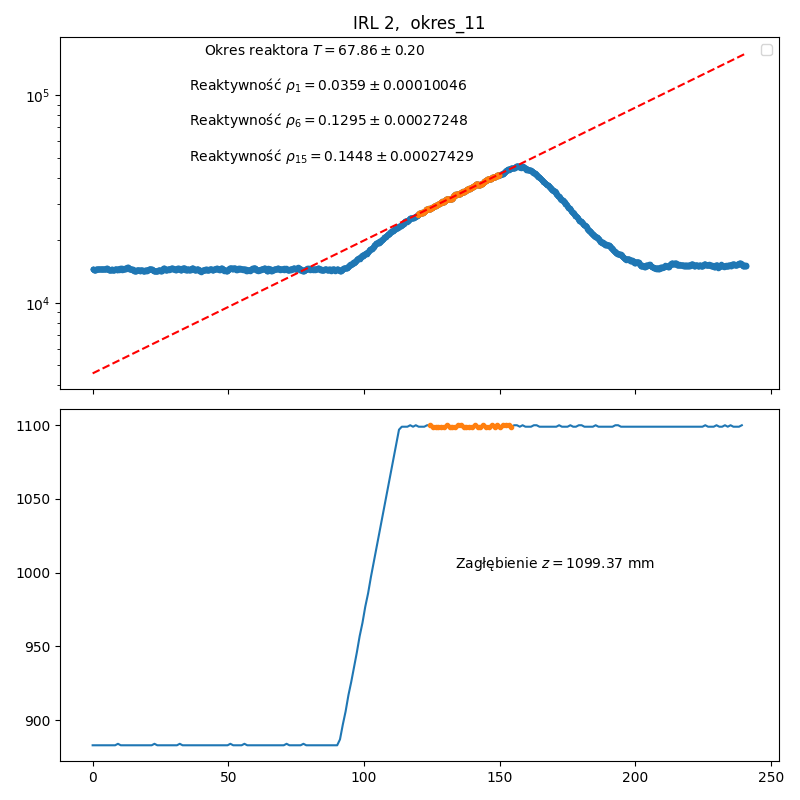

In [ ]:
fig, (ax_T, ax_Z) = plt.subplots(nrows=2, figsize=(8,8), sharex=True)

okres = 'okres_11'
irl = 2

ob_IN = 120
ob_OUT = 150

if irl == 1:
    irl_df = irl1_df
elif irl == 2:
    irl_df = irl2_df
    
obszar_IN = ob_IN*10
obszar_OUT = ob_OUT*10


y = irl_df['Flux, cps'][interwals[okres]].values
x = (irl_df['Flux, cps'][interwals[okres]].index- irl_df['Flux, cps'][interwals[okres]].index[0]).total_seconds().values
yz = trpp_df['PK6'][interwals[okres]].values
xz = (trpp_df['PK6'][interwals[okres]].index- trpp_df['PK6'][interwals[okres]].index[0]).total_seconds().values



ax_T.plot(x, y, '.')
ax_T.plot(x[obszar_IN:obszar_OUT], y[obszar_IN:obszar_OUT], '.')

A0 = y[obszar_IN]
T0 = (x[obszar_OUT]-x[obszar_IN])/(np.log(y[obszar_OUT]/y[obszar_IN]))
t00 = x[obszar_IN]
EXPOpopt0, EXPOpcov0 = curve_fit(expo, x[obszar_IN:obszar_OUT], y[obszar_IN:obszar_OUT], p0=[A0, T0, t00], maxfev = 80000)
EXPOpopt, EXPOpcov = curve_fit(expo, x[obszar_IN:obszar_OUT], y[obszar_IN:obszar_OUT], p0=EXPOpopt0)
A, T, t0 = EXPOpopt
dA, dT, dt0 = np.diag(np.sqrt(EXPOpcov))
r1 = WOG1(T)
dr1 = (WOG1(T-dT)-WOG1(T+dT))/2
r6 = WOG6(T)
dr6 = (WOG6(T-dT)-WOG6(T+dT))/2
r15 = WOG15(T)
dr15 = (WOG15(T-dT)-WOG15(T+dT))/2
z = yz[ob_IN:ob_OUT].mean()
dz = yz[ob_IN:ob_OUT].std()

ax_T.set_title(f'IRL {irl},  {okres}' )
ax_T.plot(x, expo(x, *EXPOpopt), '--', color = 'red')

ax_Z.plot(xz, yz)
ax_Z.plot(xz[ob_IN:ob_OUT], yz[ob_IN:ob_OUT], '.')

ax_T.annotate(f'Okres reaktora $T = {T:.2f} \\pm {dT:.2f}$', (0.20, 0.95), xycoords = 'axes fraction')
ax_T.annotate(f'Reaktywność $\\rho_1 = {r1:.4f} \\pm {dr1:.8f}$', (0.18, 0.85), xycoords = 'axes fraction')
ax_T.annotate(f'Reaktywność $\\rho_6 = {r6:.4f} \\pm {dr6:.8f}$', (0.18, 0.75), xycoords = 'axes fraction')
ax_T.annotate(f'Reaktywność $\\rho_{{15}} = {r15:.4f} \\pm {dr15:.8f}$', (0.18, 0.65), xycoords = 'axes fraction')

ax_Z.annotate(f'Zagłębienie $z = {z:.2f}$ mm', (0.55, 0.55), xycoords = 'axes fraction')

ax_T.set_yscale('log')
fig.tight_layout()
ax_T.legend()

#fig.savefig(f'reaktywnosc_IRL{irl}_{okres}.png', dpi = 300, bbox_inches = 'tight')


In [ ]:
drho_1 = [0.0517, 0.1164, 0.1356, 0.1161, 0.1326, 0.1329, 0.1222, 0.1178, 0.1235, 0.1266, 0.1272]
rho_1 = np.cumsum(drho_1)
sum(drho_1)

1.3026

In [ ]:
drho_2 = [0.0518, 0.1163, 0.1386, 0.1142, 0.1329, 0.1327, 0.1228, 0.1164, 0.1235, 0.1258, 0.1291]
rho_2 = np.cumsum(drho_2)

In [ ]:
zet = [219, 307, 388, 450, 517, 584, 646, 712, 790, 883, 1100]

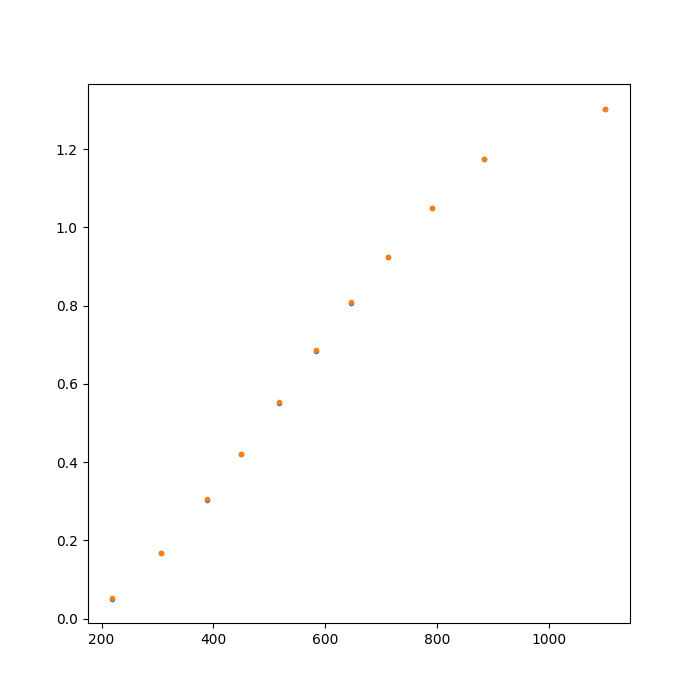

In [ ]:
fig, ax = plt.subplots(nrows=1, figsize=(7,7), sharex=True)

ax.plot(zet, rho_1, '.')
ax.plot(zet, rho_2, '.')

In [ ]:
def efekt(z, H, A, z0):
    #  H i L i z podawane w milimetrach
    L = 1000
    #H = 1286
    new_z = z-z0
    ef = 0
    ef = np.where(new_z> -H/2, A*(H/np.pi*(np.sin(new_z*np.pi/H)+1)), ef)
    ef = np.where(new_z> -H/2+L, A*(H/np.pi)*(np.sin(new_z*np.pi/H)-np.sin((new_z-L)*np.pi/H)), ef)
    ef = np.where(new_z> H/2, A*(H/np.pi)*(1-np.sin((new_z-L)*np.pi/H)), ef)
    ef = np.where(new_z> H/2+L, 0, ef)
    return ef/1000

def romax(L, H, A):
    return A*2*H*np.sin((np.pi*L)/(2*H))/(np.pi*1000)

C:\Users\marcinkowskaz\AppData\Local\Temp\ipykernel_40152\77928474.py:9: RuntimeWarning: invalid value encountered in sqrt
  dHH, dAA, dzz0 = np.diag(np.sqrt(EFEKTpcov))


Text(0.55, 0.2, '$\\rho_{max} = 1.3030704773300308$')

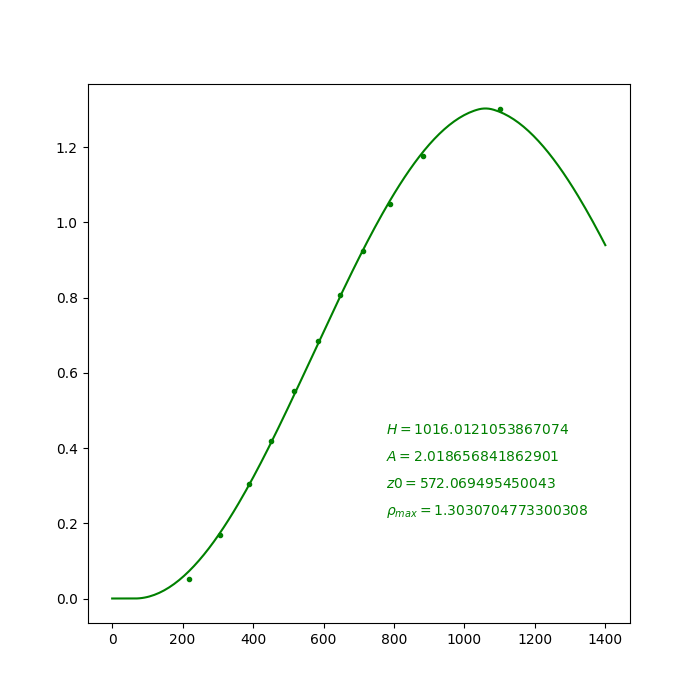

In [ ]:
fig, ax = plt.subplots(nrows=1, figsize=(7,7), sharex=True)

zuzu=np.linspace(0, 1400, 200)

ax.plot(zet, rho_1, '.', color = 'green')
EFEKTpopt0, EFEKTpcov0 = curve_fit(efekt, zet, rho_1, p0=[1280, rho_1[-1], 500], maxfev = 80000)
EFEKTpopt, EFEKTpcov = curve_fit(efekt, zet, rho_1, p0=EFEKTpopt0)
HH, AA, zz0 = EFEKTpopt
dHH, dAA, dzz0 = np.diag(np.sqrt(EFEKTpcov))
ax.plot(zuzu, efekt(zuzu, HH, AA, zz0), color = 'green')
ax.annotate(f'$H = {HH}$', (0.55, 0.35), color = 'green', xycoords = 'axes fraction')
ax.annotate(f'$A = {AA}$', (0.55, 0.3), color = 'green', xycoords = 'axes fraction')
ax.annotate(f'$z0 = {zz0}$', (0.55, 0.25), color = 'green', xycoords = 'axes fraction')
ax.annotate(f'$\\rho_{{max}} = {romax(975, HH, AA)}$', (0.55, 0.20), color = 'green', xycoords = 'axes fraction')


# dz = 120

# ax.plot(dzet(dz, zet), rho_1, '.', color = 'red')
# EFEKTpopt0, EFEKTpcov0 = curve_fit(efekt, dzet(dz, zet), rho_1, p0=[1280, rho_1[-1], 10, -0.1], maxfev = 80000)
# EFEKTpopt, EFEKTpcov = curve_fit(efekt, dzet(dz, zet), rho_1, p0=EFEKTpopt0)
# HH, AA, zz0, rr0 = EFEKTpopt
# dHH, dAA, dzz0, drr0 = np.diag(np.sqrt(EFEKTpcov))
# ax.plot(zuzu, efekt(zuzu, HH, AA, zz0, rr0), color = 'red')
# ax.annotate(f'$H = {HH}$', (0.05, 0.35), color = 'red', xycoords = 'axes fraction')
# ax.annotate(f'$A = {AA}$', (0.05, 0.3), color = 'red', xycoords = 'axes fraction')
# ax.annotate(f'$z0 = {zz0}$', (0.05, 0.25), color = 'red', xycoords = 'axes fraction')
# ax.annotate(f'$r0 = {rr0}$', (0.05, 0.20), color = 'red', xycoords = 'axes fraction')


In [ ]:
r_max = 1.7
rho_max = np.array(rho_1) + r_max - rho_1[-1]

C:\Users\marcinkowskaz\AppData\Local\Temp\ipykernel_40152\168534990.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  EFEKTpopt0, EFEKTpcov0 = curve_fit(efekt, zet, rho_max, p0=[1280, rho_max[-1], 0, 0], maxfev = 80000)
C:\Users\marcinkowskaz\AppData\Local\Temp\ipykernel_40152\168534990.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  EFEKTpopt, EFEKTpcov = curve_fit(efekt, zet, rho_max, p0=EFEKTpopt0)


Text(0.55, 0.2, '$r0 = 0.0$')

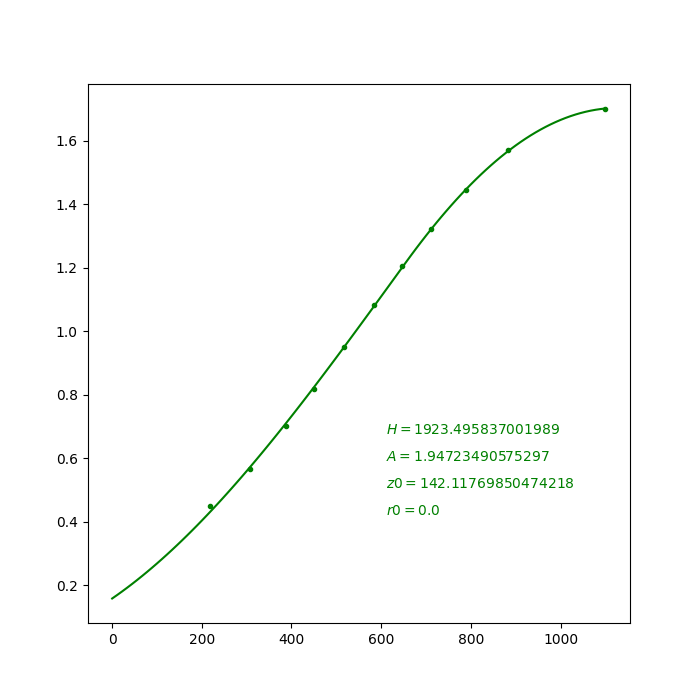

In [ ]:
fig, ax = plt.subplots(nrows=1, figsize=(7,7), sharex=True)

zuzu=np.linspace(0, 1100, 100)

ax.plot(zet, rho_max, '.', color = 'green')
EFEKTpopt0, EFEKTpcov0 = curve_fit(efekt, zet, rho_max, p0=[1280, rho_max[-1], 0, 0], maxfev = 80000)
EFEKTpopt, EFEKTpcov = curve_fit(efekt, zet, rho_max, p0=EFEKTpopt0)
HH, AA, zz0, rr0 = EFEKTpopt
dHH, dAA, dzz0, drr0 = np.diag(np.sqrt(EFEKTpcov))
ax.plot(zuzu, efekt(zuzu, HH, AA, zz0, rr0), color = 'green')
ax.annotate(f'$H = {HH}$', (0.55, 0.35), color = 'green', xycoords = 'axes fraction')
ax.annotate(f'$A = {AA}$', (0.55, 0.3), color = 'green', xycoords = 'axes fraction')
ax.annotate(f'$z0 = {zz0}$', (0.55, 0.25), color = 'green', xycoords = 'axes fraction')
ax.annotate(f'$r0 = {rr0}$', (0.55, 0.20), color = 'green', xycoords = 'axes fraction')